# Regresión logística I

* [Regresión Logística](#chapter1)
    * [Introducción](#section_1_1)
    * [¿Qué es la regresión logistica?](#section_1_2)
    * [Métricas en la regresión logistica](#section_1_3)
        * [Matriz de confusión](#section_1_3_1)
        * [Precision - Recall - F1](#section_1_3_1)
        * [Curva ROC - AUC](#section_1_3_1)
    * [Realizando una regresión logística en Python](#section_1_4)
    * [Crossvalidation y Bootstrap](#section_1_2)

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


# Introducción

Hasta ahora, hemos estado viendo como eran los modelos de regresión lineal y distintos algoritmos para poder llevar a cabo este tipo de aproximaciones. A partir de esta lección aprenderemos que es un modelo de regresión lógistica y cuáles son los pasos que deberemos seguir. 

Recordemos que: 

- Lo modelos de **regresión lineal** son aquellos en los que la variable respuesta es de tipo continua, es decir, precios de casas, el tamaño de un árbol o consumo de gasolina de un coche ...

- Los modelos de **regresión lógistica** son aquellos cuya variable respuesta será una variable de tipo categórica. Por ejemplo, tener cáncer o no, que un cliente se vaya de una compañía o no, o como veremos en los próximos jupyters si un pasajero del titanic sobrevivirá o no.  



# ¿Qué es la regresión logística?

La regresión logística es un tipo de regresión que se utiliza cuando se desea predecir la ausencia o presencia de una característica o resultado según los valores de un conjunto de predictores. Es extremadamente similar a un modelo de regresión lineal adaptado al caso en los cuales la variable respuesta (o dependiente) es dicotómica (Verdadero o Falso). 

Si tuviéramos más de una categoría también podríamos utilizar regresiones logísticas para predecir la pertenencia a una clase, para ello en lugar de utilizar un modelo tendríamos que hacer n modelos, donde n sería el número de categorías disponibles. Ya que utilizaríamos una regresión logística diferente para discriminar si el valor a predecir pertenece o no a dicha categoría.

La regresión logística es usada de forma generalizada en las ciencias sociales y médicas, cuando se desea predecir la pertenencia a grupos distintos.
Algunos ejemplos muy útiles es por ejemplo para estudiar la existencia de una enfermedad en un grupo poblacional o como clasificador de *spam* en emails.


Vamos ahora a ver como quedaría una gráfica para las predicciones de una regresión logística:

![image.png](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/regresion_lineal/log_reg.png?raw=true)

Como se puede extraer de la imagen los resultados obtenidos siempre seran dos valores, en este caso mostrado como 0 y 1. Ya que como se ha comentado en las regresiones logísiticas la variable respuesta siempre será dicotómica.

En este caso la regresión logísitica se utiliza para estimar la probabilidad de que una instancia o registro ( o si se quiere enteder como fila de nuestro conjunto de datos) pertenezca una clase en particular. Es decir, si  la probabilidad estimada calculada es mayor que el 50% de que una clase sea del grupo  1 (tambien llamada la clase positiva y con la etiqueta "1") lo asignará a esta clase. En caso de que esta probabilidad sea inferior, asignará la clase 0 (tambien llamada clase negativa y con la etiqueta "0"). De esta forma con una regresión logistica estamos consiguendo crear un clasificador binario!



📌 **NOTA :Esta parte es para las más atrevidas y que quieran meterse un poco en el formalismo matemático, no hay que comprenderlo con detalle :D.** 


Si nos ponemos a describir más formalmente como se ha conseguido es gráfica tenemos que explicar las funciones matemáticas empleadas para obtener dicha curva.


La función logística (que tiene una curva llamada sigmoide) es una curva con forma de S, definida como: $$\sigma(y)={\frac {1}{1+e^{-y}}}$$


En nuestro caso el valor de y, sería la formula de la regresión lineal multiple:

$$ y_{i}(x) = B_{0} + A_{i}\cdot x_{i} + \epsilon =  B_{0} + A_{1}\cdot x_{1} + A_{2}\cdot x_{2} + A_{3}\cdot x_{3} + ... + A_{k}\cdot x_{k} + \epsilon_{i} $$

Donde:
- y(x): La llamada variable dependiente o variable respuesta
- $A_{i}$: Coeficientes que acompañan a cada variable
- $x_{i}$: Valor de la variable independiente i-ésima, tambien llamada variable explicativa o regresora.
- $B_{0}$: Término constante o intersección, indica en que punto de la recta corta el eje.
- $ε_{i}$ el error.

Lo que nos devolvería lo siguiente al introducirla en la función logística:

$$\sigma(y)={\frac {1}{1+e^{-( B_{0} + A_{1}\cdot x_{1} + A_{2}\cdot x_{2} + A_{3}\cdot x_{3} + ... + A_{k}\cdot x_{k} + \epsilon_{i})}}}$$


Como comentario final, la función a miniminar en la regresión logística hace uso de logaritmos para obtener las diferentes probabilidades de pertenencia a cada una de las clases. 


Como hemos comentado al incio del jupyter, los pasos que debemos seguir cuando trabajamos con este tipo de problemas son los mismos que en la regresión lineal. Recordemos que, lo primero que hicimos fue hacer un buen EDA (Análisis Exploratorio) para poder entender nuestros datos. 

Pongámonos manos a la obra!!! 

# Análisis Exploratorio 

A lo largo de todas estas lecciones trabajaremos con el csv del `titanic`. Aunque ya estamos familiarizados con el, os dejamos por aquí una pequeña descripción de cada una de las variables que nos encontraremos. 

- `survived`: si sobrevivió o no al viaje. 0 = No, 1 = Si

- `pclass`: la clase a la que pertenecía el pasajero/a. 1 = primera, 2 = segunda, 3 = tercera

- `sex`: sexo del pasajer/a

- `age`: edad del pasajero/a	

- `sibsp`: número familiares a bordo del barco. Incluye  hermano, hermana, hermanastro, hermanastra, marido, mujer (se ignoran las amantes y los prometidos)

- `parch`: número de  relaciones familiares incluyendo, madre, padre, hija,  hijo, hijastra, hijastro. Algunos niños viajaron sólo con una niñera, por lo que parch=0 para ellos.

- `ticket`: el número de ticket de cada pasajero/a	

- `fare`: precio que pagaron los pasajeros

- `embarked`: donde embarcaron los pasajero/as. C = Cherbourg, Q = Queenstown, S = Southampton	

- `class`: la clase a la que pertenecían los pasajero/as (¿igual que pclass?) pero con texto. 

- `who`: si era mujer u hombre (¿igual que el sexo?)

- `adult_male`: si se trataba de un hombre adulto. 

- `deck`: la puerta de embarque de los pasajero/as

- `embark_town`: en la ciudad en la que embarcaron los pasajero/as. ¿Igual que `embarked`?

- `alive`: si sobrevivió al viaje o no. ¿Igual que `survived`? 

- `alone`: si viajaba solo o no. 




In [2]:
# lo primero que hacemos es cargar nuestro csv
df_titanic = pd.read_csv("../files/titanic.csv", index_col = 0)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Si nos fijamos en la descripción del *dataset* nos podemos dar cuenta que hay algunas columnas que nos dan la misma, por lo tanto, lo primero que vamos a hacer es eliminar algunas de esas columnas. 

Puede que no tengamos muy claro que columnas son similares o no. Para esto, nos vamos a hacer una funcioncita, para evaluar análiticamente y visualmente si esto es realmente así: 


In [3]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df_titanic[columna].unique()))
        value_counts = df_titanic[columna].value_counts()
        if plot == True:
            plt.figure()
            value_counts.plot.pie(figsize=(8,8))
        else:
            pass

 Los valores únicos para la variable embark_town son: ['Southampton', 'Cherbourg', 'Queenstown', nan]
 Los valores únicos para la variable embarked son: ['S', 'C', 'Q', nan]


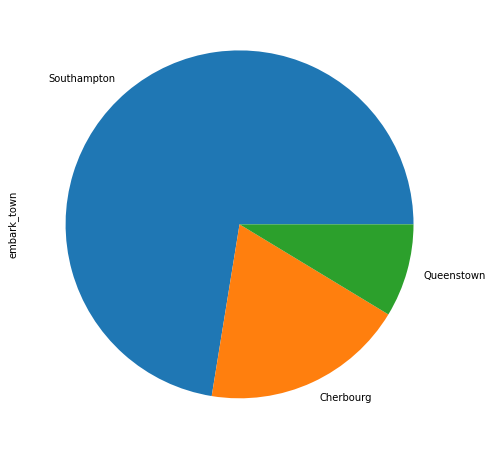

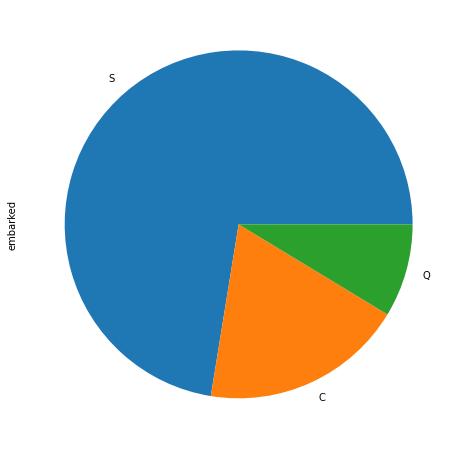

In [4]:
# empecemos con las columnas de embark_town y embarked
lista_columnas_emabarque = ['embark_town','embarked']
similar_variables(lista_columnas_emabarque)

Como podemos ver, estas dos columnas nos dan literalmente la misma información. La diferencia es que en una tenemos el nombre de la ciudad completo y en la otra solo la inicial de la ciudad. Por lo tanto procederemos a eliminar la columna de `embark_town`. 

Evaluemos ahora las columnas de `class` y `pclass`

 Los valores únicos para la variable pclass son: [3, 1, 2]
 Los valores únicos para la variable class son: ['Third', 'First', 'Second']


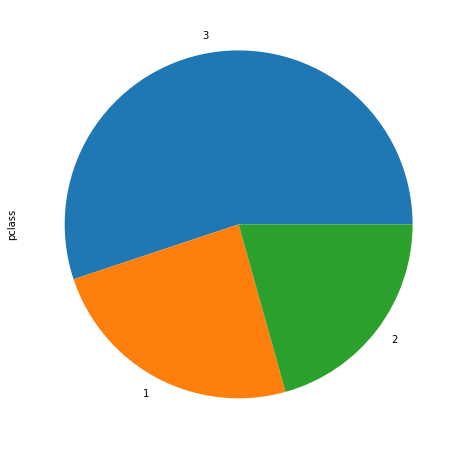

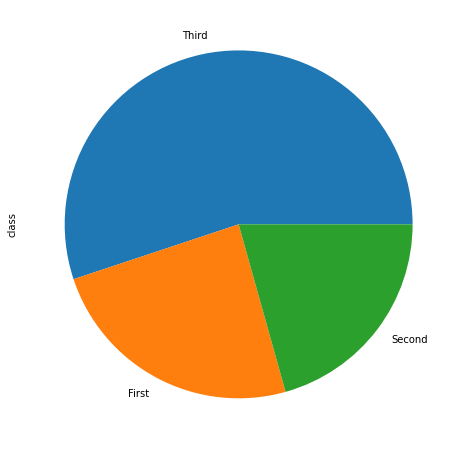

In [5]:
# empecemos con las columnas de embark_town y embarked
lista_columnas_clase=['pclass','class']
similar_variables(lista_columnas_clase)

De nuevo, estas columnas nos están dando la misma información, una de forma numérica y otra en formato de texto, por lo tanto, procederemos a eliminar `pclass`. 

Sigamos con las columnas de `alive` y `survived`

 Los valores únicos para la variable alive son: ['no', 'yes']
 Los valores únicos para la variable survived son: [0, 1]


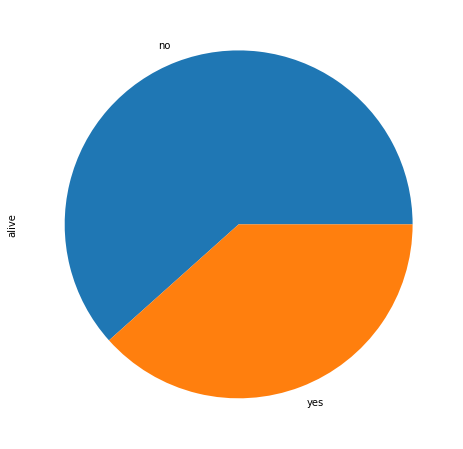

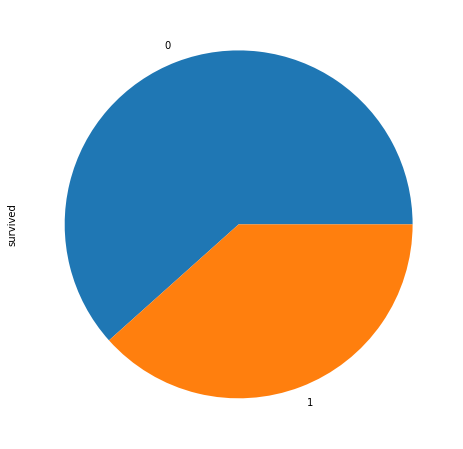

In [6]:
lista_columnas_supervivientes = ["alive", "survived"]
similar_variables(lista_columnas_supervivientes)

De nuevo, tenemos la misma información, por lo que eliminaremos una de ellas.

¿Qué está pasando con las columnas `who` y `sex`? Comprobemoslo! 

 Los valores únicos para la variable who son: ['man', 'woman', 'child']
 Los valores únicos para la variable sex son: ['male', 'female']


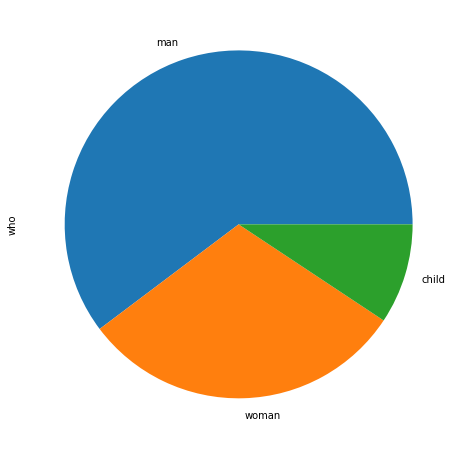

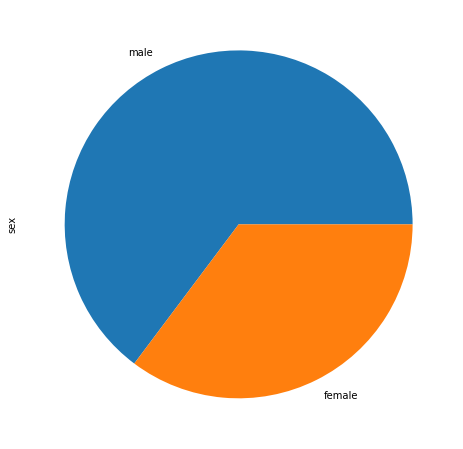

In [7]:
lista_columnas_sexo = ["who", "sex"]
similar_variables(lista_columnas_sexo)

En esencia estas dos columnas no nos dan la misma información ya que la primera tiene una categoría más, por lo tanto, de momennto las mantendremos las dos. Por último, una de las columnas con las que podemos tener dudas en con `sibsp` y `parch`. Comprobemoslo: 

 Los valores únicos para la variable sibsp son: [1, 0, 3, 4, 2, 5, 8]
 Los valores únicos para la variable parch son: [0, 1, 2, 5, 3, 4, 6]


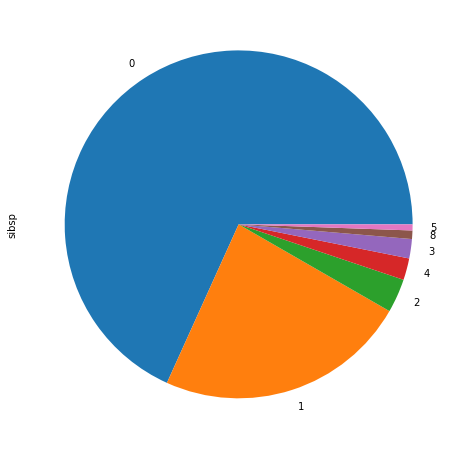

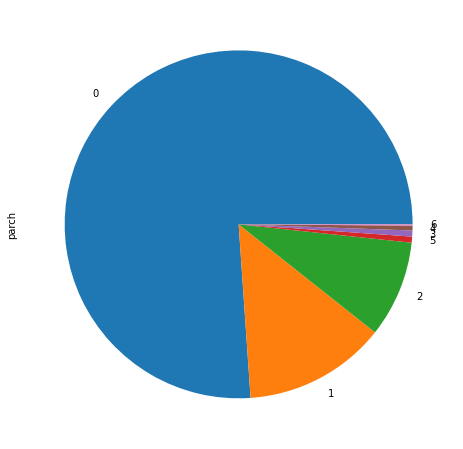

In [8]:
lista_columnas_familia = ["sibsp", "parch"]
similar_variables(lista_columnas_familia)

En este caso no tenemos la misma información en las dos columnas, por lo tanto, dejaremos las dos columnas. 


Después de todo este análisis, eliminaremos `alive`, `class`, `who`, `embark_town`. Recordemos que `sklearn` las letras no las podemos usar, y que las variables de tipo categórica deberemos codificarlas. Es por esto, que en algunos casos hemos decidido quedarnos con la que es de tipo numérica directamente. 

In [9]:
df_titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [10]:
df_titanic.drop(["alive", "embark_town"], axis = 1, inplace=True)

In [11]:
# Cuantas filas y columnas tenemos
df_titanic.shape

(891, 13)

In [12]:
# información básica sobre el dataset
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         714 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  deck        203 non-null    object 
 12  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 85.3+ KB


In [13]:
# principales estadísticos variables numéricas
df_titanic.describe().T


,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
# principales estadísticos variables categóricas
df_titanic.describe(include="object").T

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59


In [15]:
# Cuántos valores nulos tenemos en el dataset
df_titanic.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alone           0
dtype: int64

Vemos que tenemos tenemos nulos en 3 columnas. Calculemos el porcentaje de nulos que tenemos en cada una de las columnas

In [16]:
nulos_edad = round(df_titanic["age"].isnull().sum() / df_titanic.shape[0], 3)
print(f"El porcentaje de nulos para la columna age es de : {nulos_edad}")

El porcentaje de nulos para la columna age es de : 0.199


In [17]:
nulos_deck = round(df_titanic["deck"].isnull().sum() / df_titanic.shape[0], 3)
print(f"El porcentaje de nulos para la columna deck es de : {nulos_deck}")

El porcentaje de nulos para la columna deck es de : 0.772


In [18]:
nulos_embark = round(df_titanic["embarked"].isnull().sum() / df_titanic.shape[0], 3)
print(f"El porcentaje de nulos para la columna embarked es de : {nulos_embark}")

El porcentaje de nulos para la columna embarked es de : 0.002


En este caso, tenemos una columna con una gran porcentaje de nulos (`deck`) la cuál eliminaremos. Por otro lado, tenemos las columnas `age` y `embarked` donde sus porcentajes de nulos es bajo.. En este caso, los reemplazaremos por la mediana usando el método `fillna` en el caso de la variable `age` y por la moda en `embarked`. 

In [19]:
# reemplazamos nulos de la columna age
df_titanic["age"].fillna(df_titanic["age"].median(), inplace= True)

# reemplazamos nulos de la columna embarked
df_titanic["embarked"].fillna(df_titanic["embarked"].mode()[0], inplace= True)

In [20]:
# eliminamos la columna "deck"

df_titanic.drop("deck", axis = 1, inplace=True)

In [21]:
df_titanic.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [22]:
# Cuántos valores nulos tenemos en el dataset
df_titanic.duplicated().sum()


116

In [23]:
# tenemos 116 duplicados, por lo que los eliminaremos, no nos interesa tener información duplicada

df_titanic.drop_duplicates(inplace=True)

In [24]:
# Exploramos los tipos de los datos que tenemos
df_titanic.dtypes

survived        int64
pclass          int64
sex            object
age           float64
sibsp           int64
parch           int64
fare          float64
embarked       object
class          object
who            object
adult_male       bool
alone            bool
dtype: object

In [25]:
df_titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,False


Si nos fijamos en el tipo de datos, y le damos una pensada veremos que algunos tipos de datos no son del todo correctos. 

Sin tener en cuenta la futura codificación de las variables categóricas que tenemos que hacer, desgranemos los tipos de datos. 

- survived: es numérica. Esto nos vendrá bien para el modelo, que tendrá que estar en este formato. Por lo tanto, lo dejamos así, ya que para el análisis exploratorio no nos afectará. 

- pclass: es numérica, pero esta variable es categórica! Por lo tanto, debemos cambiar este tipo de dato.

- sex: es categórica, y tiene un tipo de dato de *string*, por lo tanto, está en el formato correcto. Aunque luego tendremos que codificar esta variable. 

- age: es una variable numérica que esta en tipo float, esta perfecta, no tendremos que hacer nada. 

- sibsp y parch: estas dos variables hacen referencia al número de familiares, por lo que las unificaremos en una única.             

- fare: es una variable numérica, ya que hacía referencia al precio que pagaban los pasajeros por el billete, por lo tanto, tiene el tipo de dato que le corresponde. 

- embarked: hacía referencia a la puerta de embarque, es una categórica que está en formato *string* por lo que está bien. 

- class: igual que en el caso anterior, esta columna está bien ya que es una variable de tipo categórica. 
- who: el mismo caso que la columna anterior.

- adult_male: se trata de una columna de tipo categórica, esta en formato booleano. Para evitar problemas en futuro, la convertiremos a categoría. 

- alone: lo mismo que la variable anterior. 


In [26]:
# juntamos las dos variables de sibsp y parch 
df_titanic['num_familiar'] = df_titanic['sibsp'] + df_titanic['parch']


In [27]:
# Convertiomos la variable de who a si es adulto o niño.
df_titanic['who'].replace({'man':'adult','woman':'adult'}, inplace =True)
df_titanic.rename(columns = {'who':'maturity'}, inplace= True)

In [28]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,maturity,adult_male,alone,num_familiar
0,0,3,male,22.0,1,0,7.2500,S,Third,adult,True,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,adult,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,adult,False,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,adult,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,adult,True,True,0


In [29]:
# eliminamos las columnas que ya no nos interesan

df_titanic.drop(["sibsp", "parch", "class"], axis = 1, inplace = True)

In [30]:
df_titanic.head(1)

,survived,pclass,sex,age,fare,embarked,maturity,adult_male,alone,num_familiar
0,0,3,male,22.0,7.25,S,adult,True,False,1



En Python, existe un tipo de dato que no habíamos visto hasta ahora, el tipo de dato `category`. Al igual que podemos convertir una columna a número o *string* podremos cambiarlo a *category*  usando el método `astype`. 

In [31]:
columnas_categoria = ["pclass", "sex", "embarked", "maturity", "adult_male", "alone"]

for i in columnas_categoria:
    df_titanic[i] = df_titanic[i].astype("category")

In [32]:
# veamos ahora cuáles son los tipos de los datos

df_titanic.dtypes

survived           int64
pclass          category
sex             category
age              float64
fare             float64
embarked        category
maturity        category
adult_male      category
alone           category
num_familiar       int64
dtype: object

## Análisis exploratorio visual
En este apartado realizaremos una serie de gráficos para entender el problema y entender cuáles son las principales características que determinan que una persona sobreviviera en el barco del titanic o no. 

### Variable respuesta

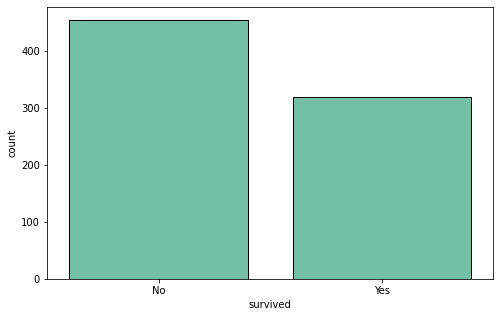

In [33]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df_titanic, x = "survived",  color = "mediumaquamarine",  edgecolor='black')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [34]:
# ¿en porcentaje esto que significa?
df_titanic["survived"].value_counts() / df_titanic.shape[0]


0    0.587097
1    0.412903
Name: survived, dtype: float64

📌 El 58% de los pasajeros que iban en el titanic murieron en el accidente. 

### Variables catégoricas

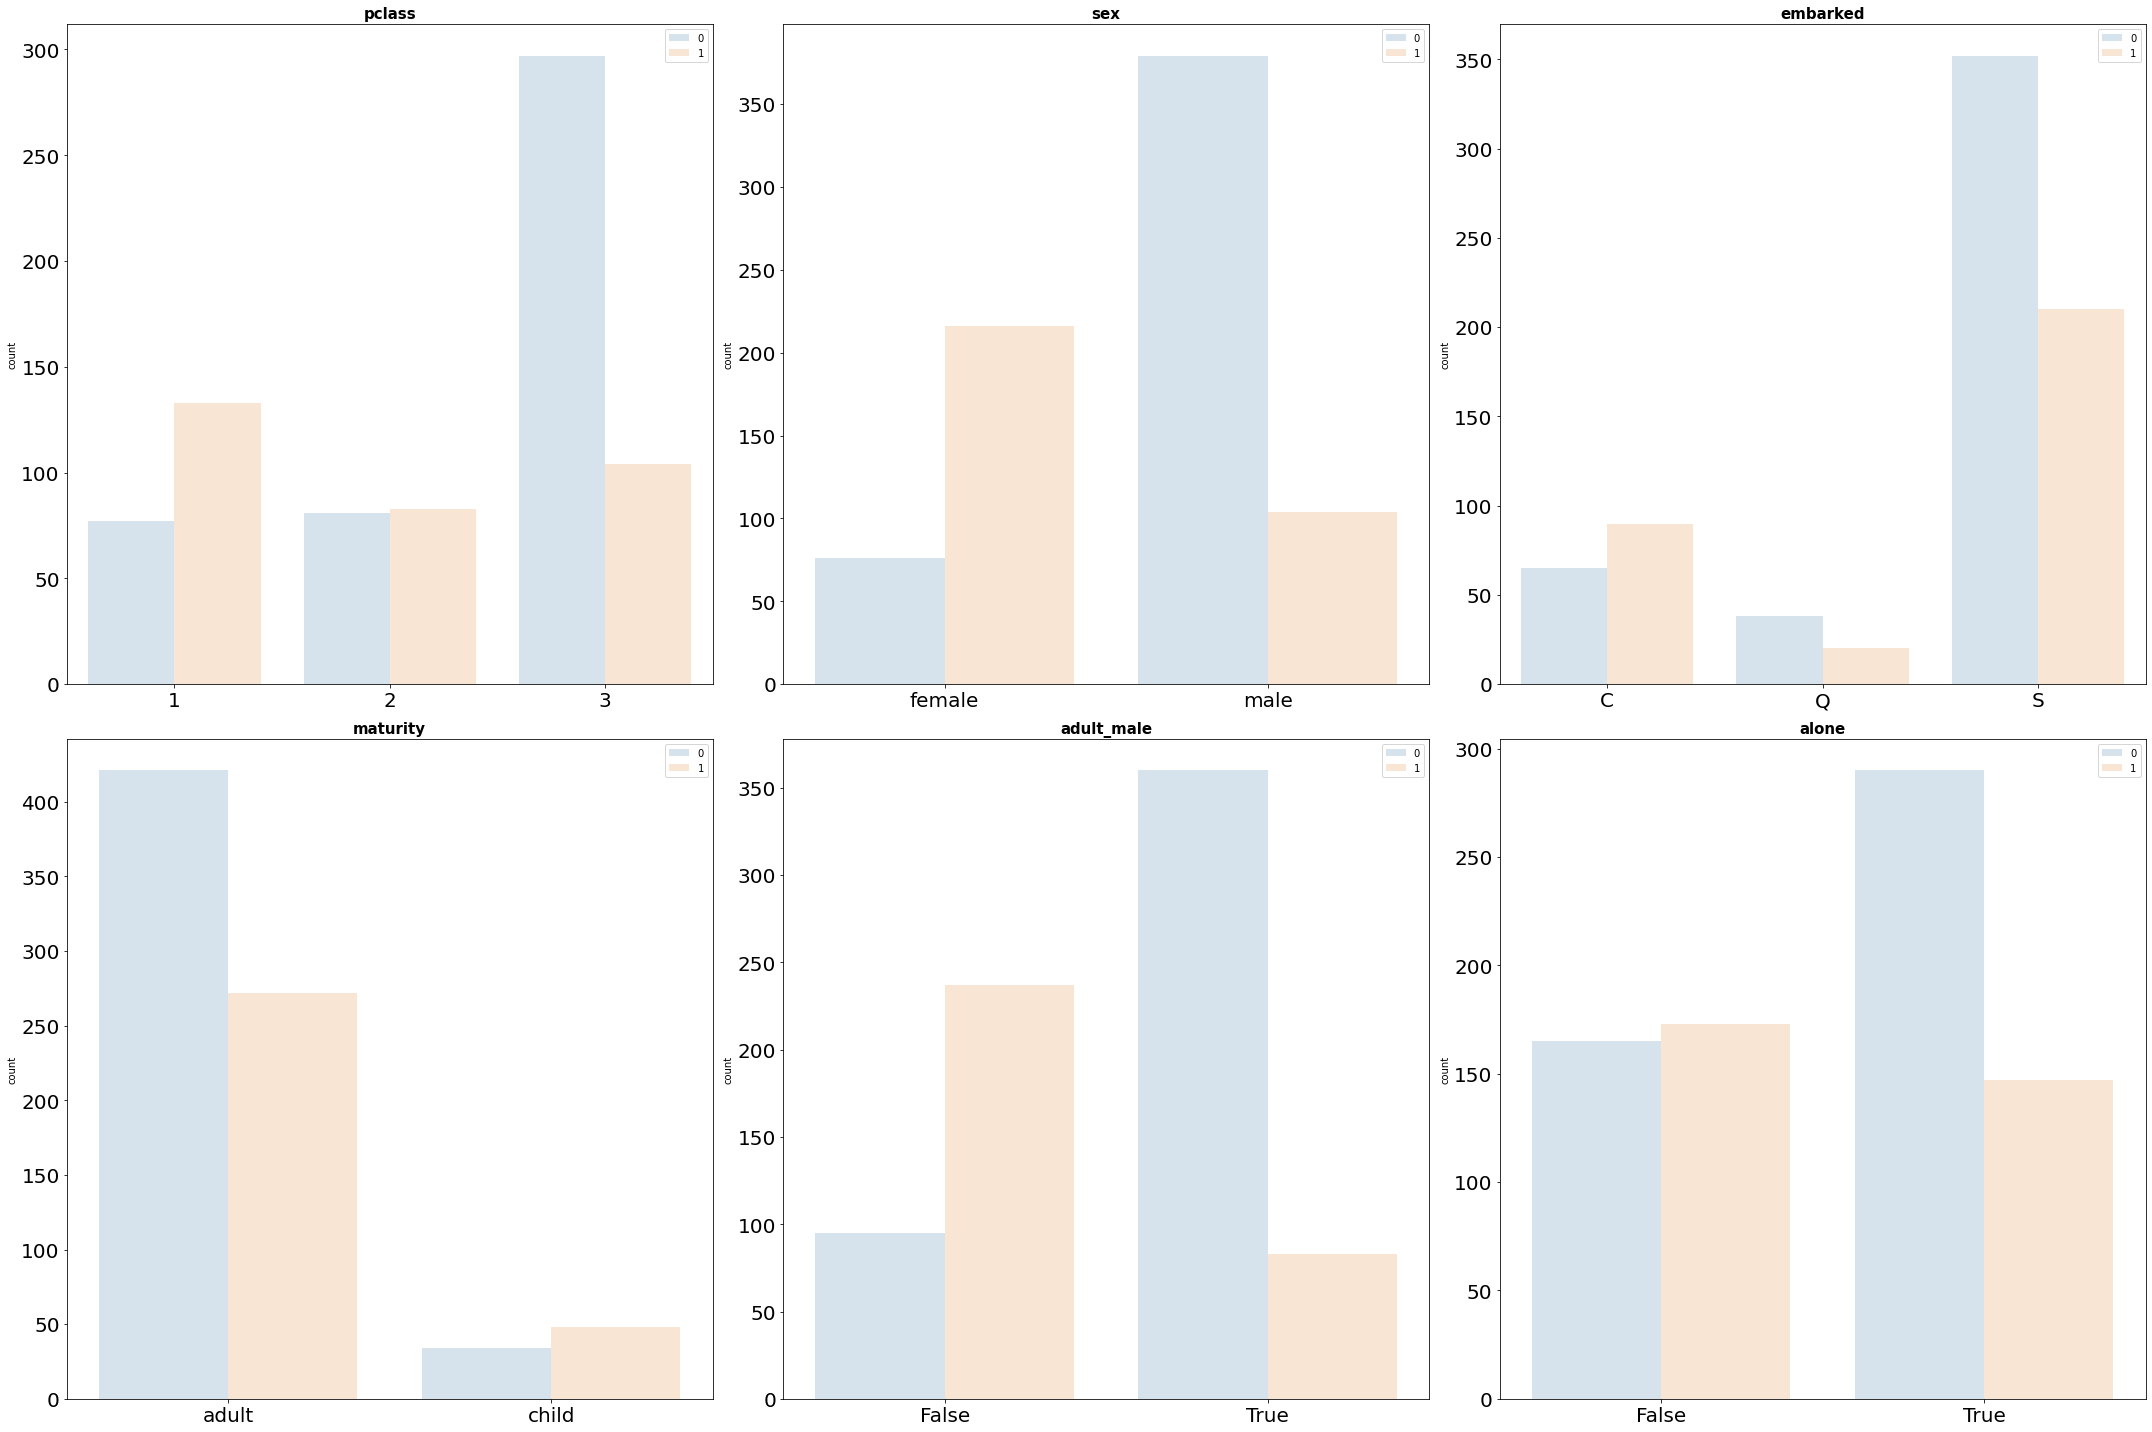

In [35]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

axes = axes.flat
columnas_cat = df_titanic.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df_titanic,
        x = colum,
        hue = "survived",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")

fig.tight_layout();

Las principales conclusiones del análisis de variables categóricas son: 

> Es vuestro turno, viendo las gráficas anteriores, ¿qué conclusiones sacáis?. Las discutiremos en la clase. 


### Variables continuas

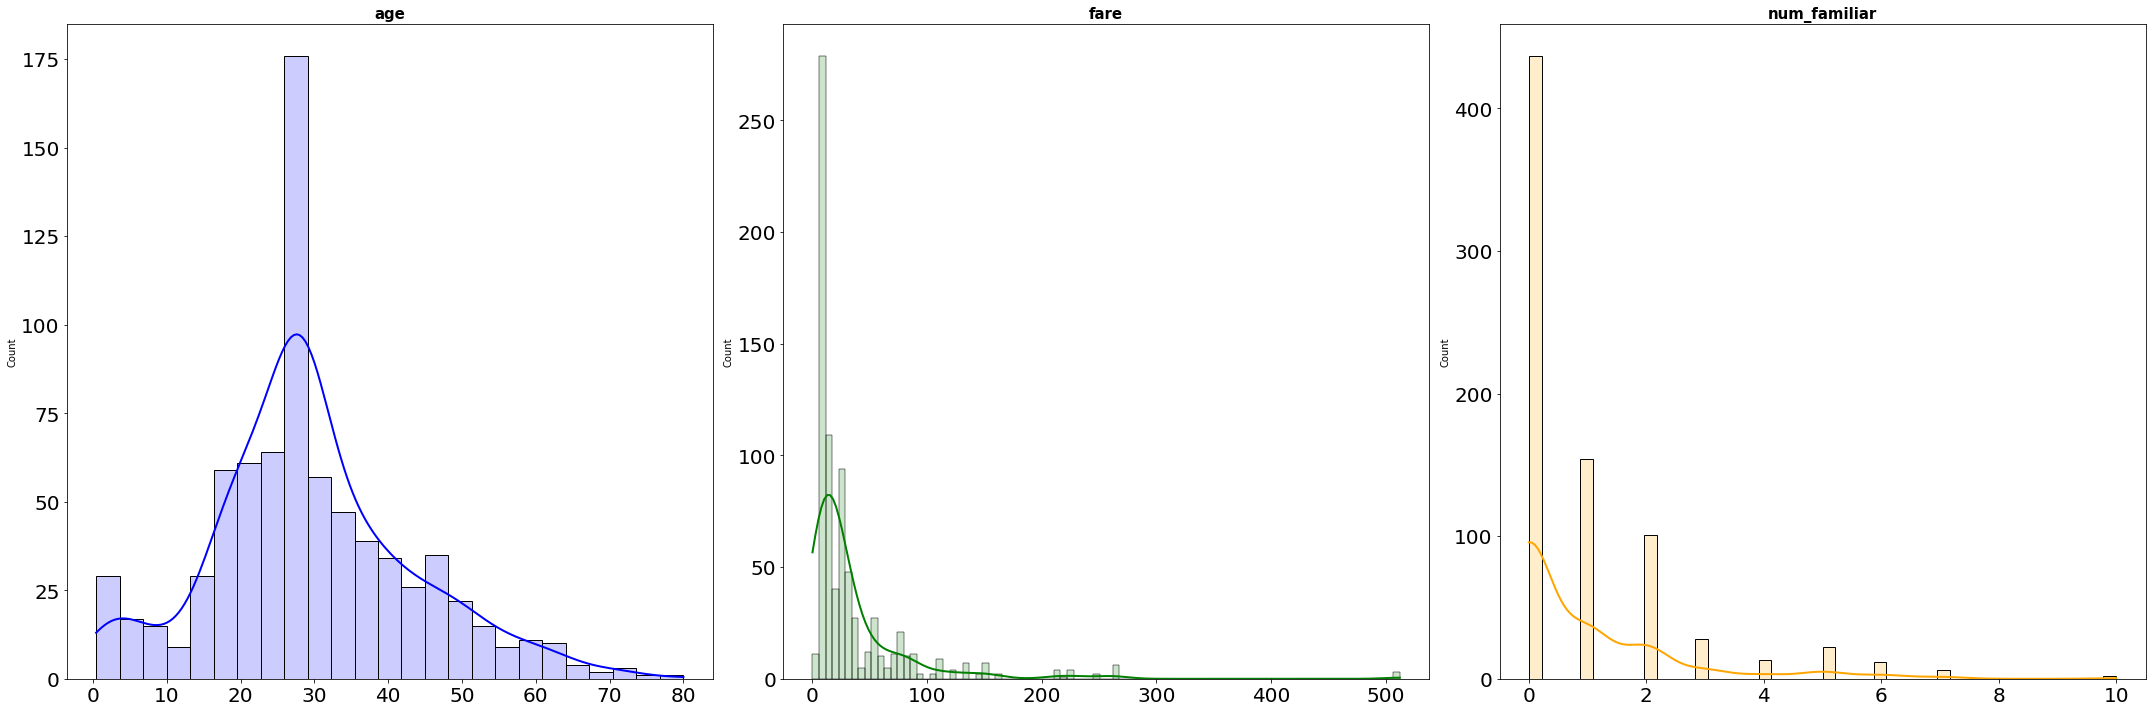

In [36]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "orange"]

axes = axes.flat

columnas_numeric = df_titanic.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("survived")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_titanic,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

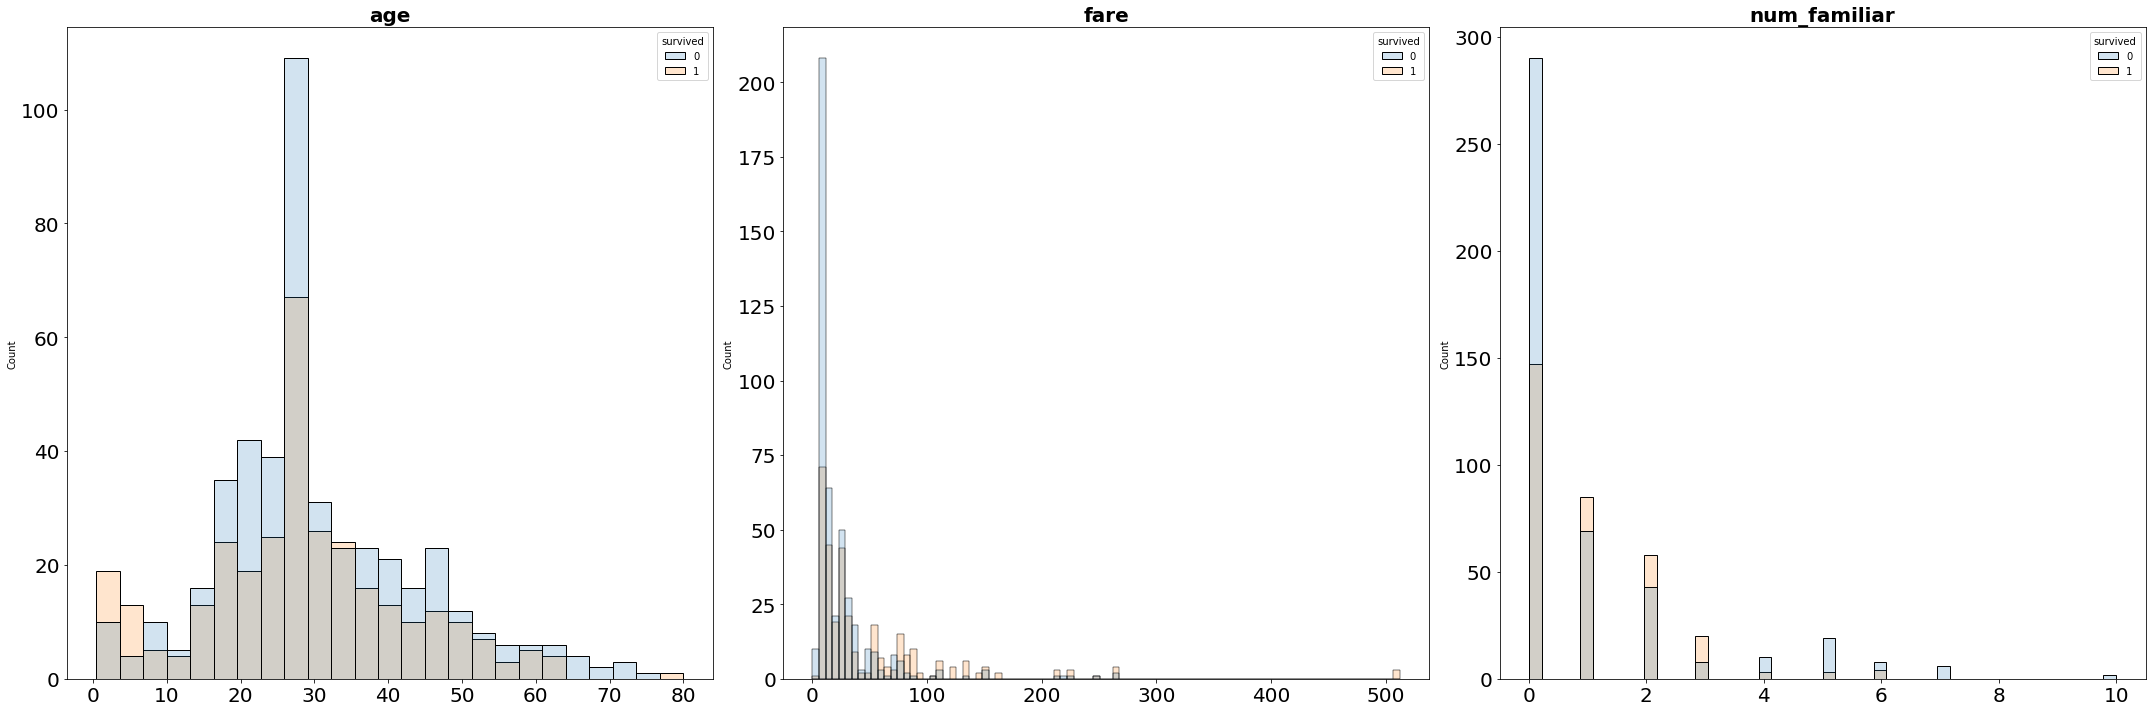

In [37]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df_titanic.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("survived")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_titanic,
        x = colum,
        hue = "survived", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

Estas son las principales conclusiones extraidas: 

> De nuevo es vuestro turno, ¿qué conclusiones sacáis de las gráficas anteriores?

## Gráfico de correlación o Heatmap

Recordemos que los mapas de calor son un tipo de gráfico que es necesario cuando necesitamos encontrar la relación entre las variables dependientes o predictoras. Una de las mejores maneras de encontrar la relación entre las características se puede hacer utilizando mapas de calor.

In [38]:
df_numericas = df_titanic.select_dtypes(include = np.number)
df_numericas.head()

,survived,age,fare,num_familiar
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [39]:
# creamos la matriz de correlación
correlacion = df_numericas.corr()
correlacion

,survived,age,fare,num_familiar
survived,1.000000,-0.078114,0.247159,0.013954
age,-0.078114,1.000000,0.092503,-0.282479
fare,0.247159,0.092503,1.000000,0.192341
num_familiar,0.013954,-0.282479,0.192341,1.000000


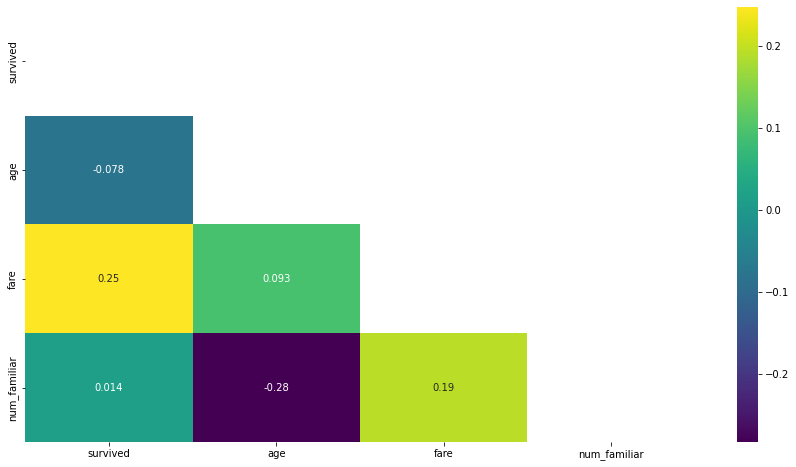

In [40]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

Ninguna de nuestras variables tiene un valor de correlación mayor que 0.7 o menos que -0.7, por lo tanto, no eliminaremos ninguna columna. 

# Preprocesamiento

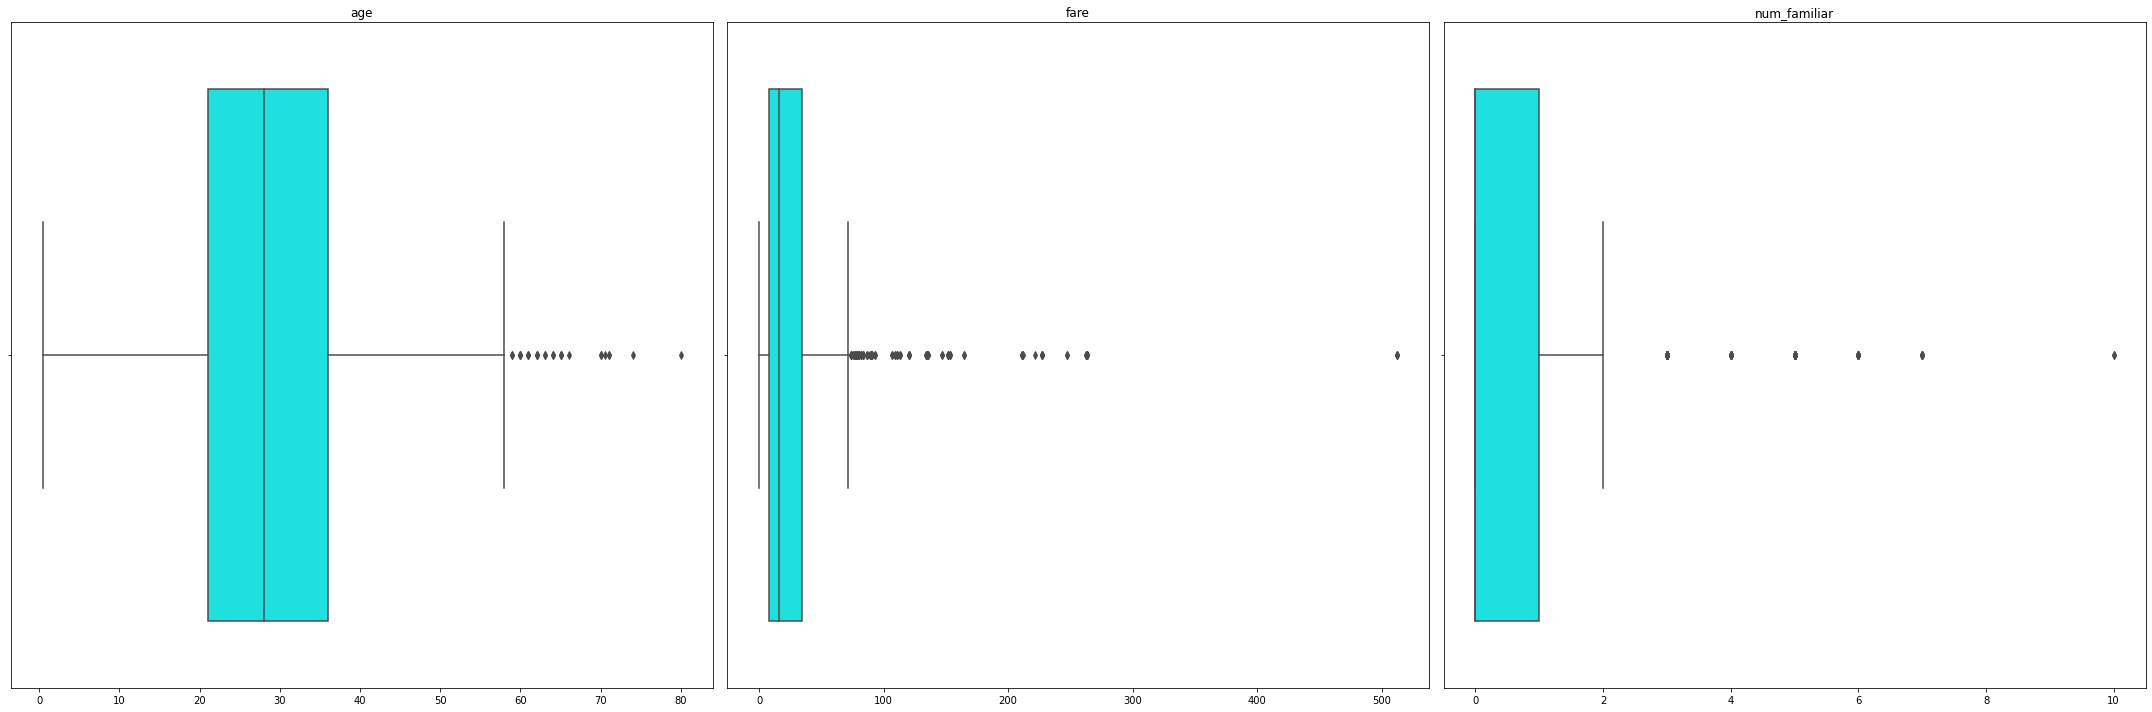

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))

categorias = df_numericas.drop("survived", axis = 1).columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df_titanic[cate], data = df_titanic, ax=axes[indice], color = "cyan"); # para trazar una línea de densidad

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

In [42]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [43]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['survived', 'age', 'fare', 'num_familiar'], dtype='object')

In [44]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df_titanic)
print(ind)

{'age': [33, 54, 94, 96, 116, 170, 232, 252, 275, 280, 326, 366, 438, 456, 483, 493, 545, 570, 587, 625, 630, 672, 684, 694, 745, 829, 851], 'fare': [27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 195, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 325, 332, 334, 337, 341, 366, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 759, 763, 765, 779, 789, 802, 820, 829, 835, 849, 856, 879], 'num_familiar': [7, 13, 16, 24, 25, 27, 43, 50, 58, 59, 63, 68, 71, 85, 86, 88, 93, 119, 147, 159, 164, 167, 171, 176, 180, 182, 183, 229, 233, 261, 266, 278, 297, 305, 311, 341, 360, 374, 386, 390, 435, 436, 437, 438, 448, 450, 469, 472, 480, 498, 529, 541, 542, 567, 600, 608, 610, 615, 618, 634, 638, 642, 678, 683, 685, 686, 726, 736, 742, 754

In [45]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    mediana = df_titanic[k].median() # calculamos la mediana para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df_titanic.loc[i,k] = mediana 

In [46]:
# vamos a gurdar el csv para seguir usándolo en próximas lecciones

df_titanic.to_csv("../files/titanic_limpio.csv")

# Ejercicio 1

Realiza el análisis exploratorio con el dataset de breast_cancer de sklearn.
```python
from sklearn.datasets import load_breast_cancer
df_cancer = load_breast_cancer()
````